## Smoothing and Edge Detection

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage.io import imread
from skimage.util import random_noise
from skimage.filters import gaussian, median
from skimage.morphology import disk
from skimage import img_as_ubyte

In [2]:
# load your image
image = imread('image.jpg')
np_image = np.array(image)
print(np_image.shape)

(913, 688, 3)


## Filtering

Filtering is a technique used in image processing to modify or enhance images. It works by applying a mathematical operation (usually a kernel or mask) over pixels to smooth, sharpen, or detect edges.

### Smothing

Smoothing is used to reduce noise and blur in an image by averaging pixel values with their neighbors. It helps to make the image cleaner and less sharp.

#### Gaussian Smothing

Gaussian smoothing is a blurring technique that reduces noise by averaging pixel values using a Gaussian (bell-shaped) kernel. It gives more weight to the center pixel and less to distant neighbors, preserving edges better than simple averaging.


In [3]:
# introducing random noise
noise_image = random_noise(image, mode='gaussian', var=0.05)

# smoothing image using gaussian smoothing
sigma = 1
smoothed_image = gaussian(noise_image, channel_axis=-1, sigma=sigma)

In [4]:
plt.figure(figsize=(10, 6))  # You can adjust the size as needed

plt.imshow(image)
plt.axis('off')

plt.show()

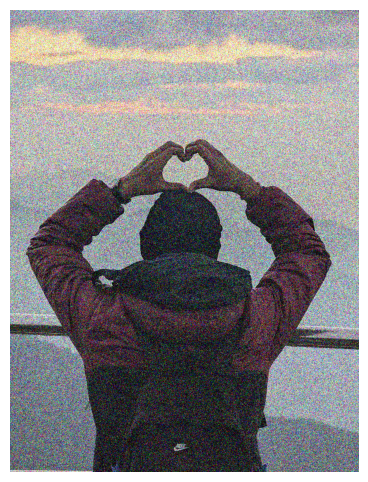

In [5]:
plt.figure(figsize=(10, 6))  # You can adjust the size as needed

plt.imshow(noise_image)
plt.axis('off')

plt.show()

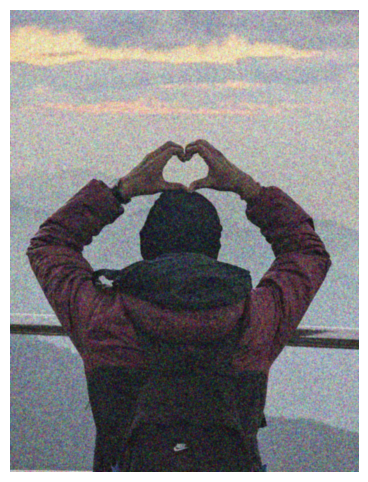

In [6]:
plt.figure(figsize=(10, 6))  # You can adjust the size as needed

plt.imshow(smoothed_image)
plt.axis('off')

plt.show()

#### Salt & Pepper Noise

Salt and Pepper noise is a type of noise added to the image where random bright and dim pixels (range around 0 and 255) are introduced into the image.

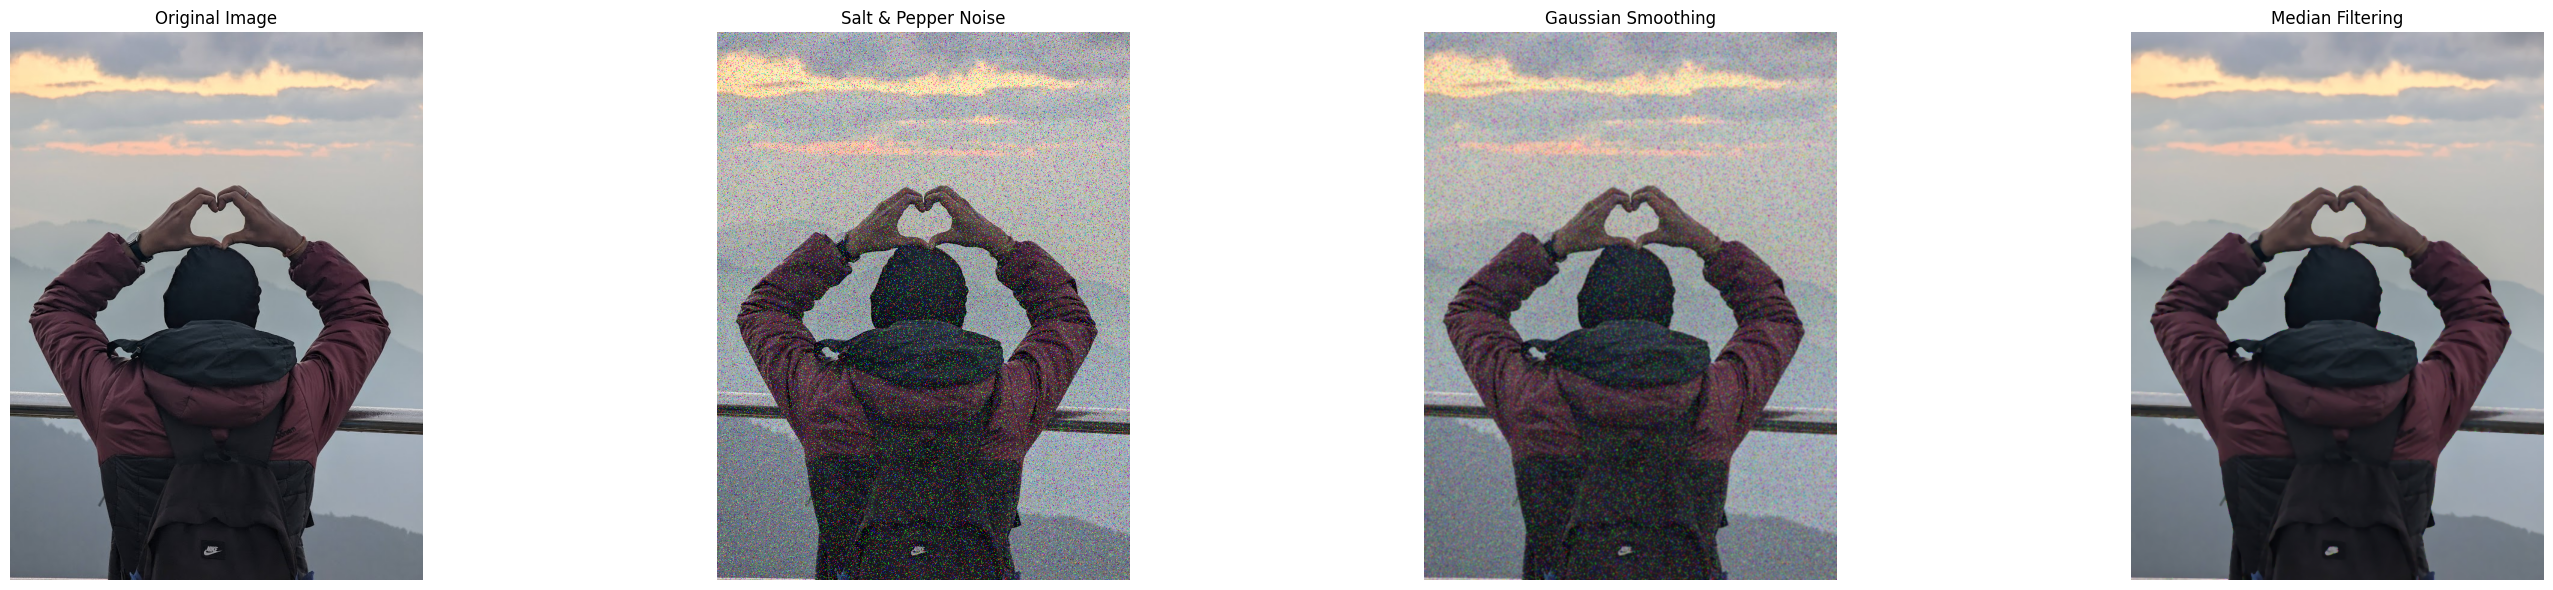

In [7]:

# Add salt & pepper noise
salt_pepper_noise = random_noise(image, mode="s&p", amount=0.1)
salt_pepper_noise_uint8 = img_as_ubyte(salt_pepper_noise)  # convert to uint8 for filtering

# Gaussian smoothing on noisy image
gaussian_smoothed = gaussian(salt_pepper_noise, sigma=1, channel_axis=-1)
gaussian_smoothed_uint8 = img_as_ubyte(gaussian_smoothed)

# Median filtering on noisy image
median_smoothed = np.zeros_like(salt_pepper_noise_uint8)

for c in range(salt_pepper_noise_uint8.shape[2]):
    median_smoothed[..., c] = median(salt_pepper_noise_uint8[..., c], footprint=disk(3))

# Plotting results
fig, axes = plt.subplots(1, 4, figsize=(30, 6))
titles = ['Original Image', 'Salt & Pepper Noise', 'Gaussian Smoothing', 'Median Filtering']
images = [image, salt_pepper_noise_uint8, gaussian_smoothed_uint8, median_smoothed]

for i in range(len(images)):
    axes[i].imshow(images[i])
    axes[i].set_title(titles[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### Edge Detection

Edge detection is the process of finding boundaries or sharp changes in intensity in an image. It helps identify object outlines and important features by highlighting where pixel values change rapidly.
Edges are important because they capture the structural information in an image.

#### Sobel filter for Edge Detection

Detect edges by computing the rate of change of pixel intensities in an image.

*  If there is a huge difference in between the intensities between the adjacent pixels then it is considered as the edge detected else not an edge.


In [8]:
np_image = np_image[:,:,0:3]
print(np_image.shape)

(913, 688, 3)


In [9]:
gray_image = color.rgb2gray(np_image)
print(gray_image.shape)

(913, 688)


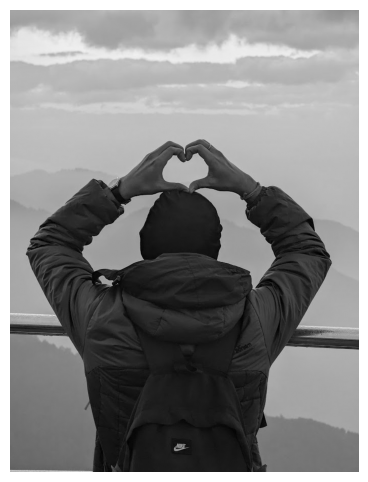

In [10]:
plt.figure(figsize=(10, 6))  # You can adjust the size as needed

plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.show()

In [11]:
X_sobel = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
print(X_sobel)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [12]:
Y_sobel = np.array([[1,2,1], [0,0,0], [-1,-2,-1]])
print(Y_sobel)

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [13]:
def convolution2d(image, kernel):
  image_height = image.shape[0]
  image_width = image.shape[1]
  kernel_height = kernel.shape[0]
  kernel_width = kernel.shape[1]
  pad_height = kernel_height // 2
  pad_width = kernel_width // 2

  output = np.zeros((image_height, image_width))

  padded = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode="constant" )

  for i in range(image_height):
    for j in range(image_width):
      patch = padded[i : i+kernel_height, j: j+kernel_width]

      output[i,j] = np.sum(patch*kernel)
  return output

In [14]:
xsobel_output = convolution2d(gray_image, X_sobel)
ysobel_output = convolution2d(gray_image, Y_sobel)

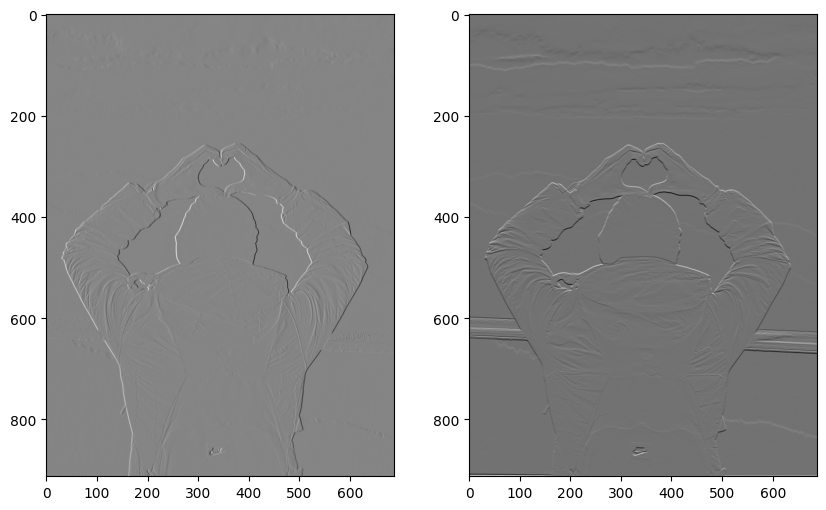

In [15]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(xsobel_output, cmap = 'gray')

plt.subplot(1,2,2)
plt.imshow(ysobel_output, cmap = 'gray')

In [16]:
total_sobel_output = np.sqrt(xsobel_output ** 2 + ysobel_output ** 2)
total_sobel_output = (total_sobel_output / np.max(total_sobel_output)) * 255
total_sobel_output = total_sobel_output.astype(np.uint8)

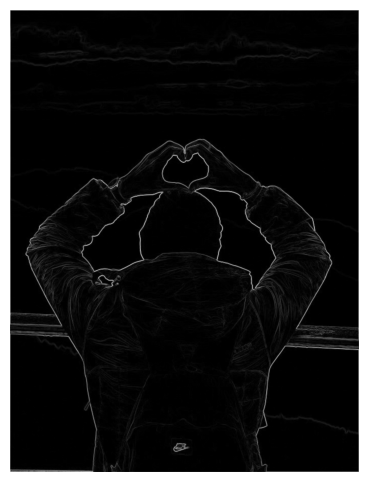

In [17]:
plt.figure(figsize=(10, 6))  # You can adjust the size as needed

plt.imshow(total_sobel_output, cmap='gray')
plt.axis('off')

plt.show()

#### Laplace Filter

#### Laplace Filter
It's an edge detection filter.

It uses the second-order derivative to detect edges, especially rapid intensity changes.

Unlike Sobel (which looks at direction), Laplacian focuses on where intensity sharply changes, regardless of direction.

In [18]:
laplace_kernel = np.array([[[1, 1, 1], [1,-8,1], [1,1,1]], [[0, 1, 0], [1,-4,1], [0,1,0]],  [[0, -1, 0], [-1,4,-1], [0,-1,0]]])
for i in range(3):
    print(f"Kernel {i+1}:\n", laplace_kernel[i], "\n")

Kernel 1:
 [[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] 

Kernel 2:
 [[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]] 

Kernel 3:
 [[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]] 



In [19]:
laplace_filtered = []
np_image = np_image[:,:,0:3]
print(np_image.shape)
gray_image = color.rgb2gray(np_image)
for i in range(3):
  filtered = convolution2d(gray_image, laplace_kernel[i])
  laplace_filtered.append(filtered)


(913, 688, 3)


In [20]:
# Titles
titles = ['Laplacian Kernel 1', 'Laplacian Kernel 2', 'Laplacian Kernel 3']

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    axes[i].imshow(laplace_filtered[i], cmap='gray')
    axes[i].set_title(titles[i])
    axes[i].axis('off')

plt.show()

In [21]:
def log_kernel(size, sigma):
    ax = np.arange(-size // 2 + 1., size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    norm = (xx**2 + yy**2) / (2.0 * sigma**2)
    kernel = (-1 / (np.pi * sigma**4)) * (1 - norm) * np.exp(-norm)
    return kernel

kernel_9x9 = log_kernel(size=9, sigma=1.5)

print(kernel_9x9)

[[ 0.00031354  0.00110734  0.00254335  0.00399498  0.00459     0.00399498
   0.00254335  0.00110734  0.00031354]
 [ 0.00110734  0.00345484  0.00660789  0.00832792  0.00850934  0.00832792
   0.00660789  0.00345484  0.00110734]
 [ 0.00254335  0.00660789  0.00826536  0.00229982 -0.00287212  0.00229982
   0.00826536  0.00660789  0.00254335]
 [ 0.00399498  0.00832792  0.00229982 -0.02239715 -0.03915892 -0.02239715
   0.00229982  0.00832792  0.00399498]
 [ 0.00459     0.00850934 -0.00287212 -0.03915892 -0.06287603 -0.03915892
  -0.00287212  0.00850934  0.00459   ]
 [ 0.00399498  0.00832792  0.00229982 -0.02239715 -0.03915892 -0.02239715
   0.00229982  0.00832792  0.00399498]
 [ 0.00254335  0.00660789  0.00826536  0.00229982 -0.00287212  0.00229982
   0.00826536  0.00660789  0.00254335]
 [ 0.00110734  0.00345484  0.00660789  0.00832792  0.00850934  0.00832792
   0.00660789  0.00345484  0.00110734]
 [ 0.00031354  0.00110734  0.00254335  0.00399498  0.00459     0.00399498
   0.00254335  0.00110

In [22]:
laplace_output = convolution2d(gray_image, kernel_9x9)

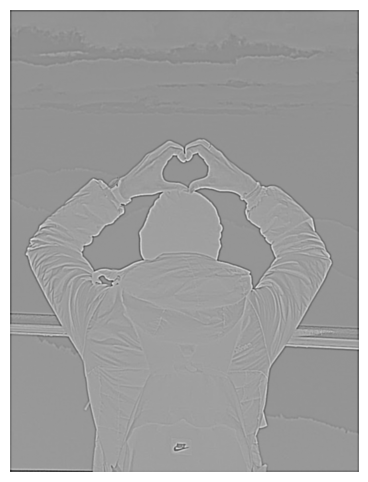

In [23]:
plt.figure(figsize=(10, 6))  # You can adjust the size as needed

plt.imshow(laplace_output, cmap='gray')
plt.axis('off')

plt.show()

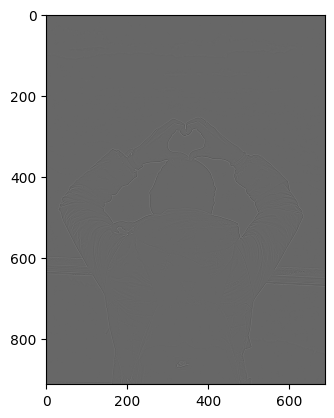

In [24]:
from skimage.filters import laplace

edge_laplace = laplace(gray_image)

plt.imshow(edge_laplace, cmap='gray')